In [19]:
#join all cvs and look at all the columns
#find the most impactful features, some maybe linearly dependent 
#explore sequence_aligment_aa_light, #sequence_aligment_aa_heavy 
#explore cdr3_start_light, #cdr3_end_light
    #extract sequences, count the number of amino acids, then plot histogram.
#pd.read_csv(“[FILE NAME].csv.gz", compression="gzip", sep=",", skiprows=1)
  

In [65]:
import os
import pandas as pd
import glob

In [88]:
all_files = glob.glob("datasets/*.csv.gz")

In [89]:
df = pd.concat((pd.read_csv(f, compression="gzip", sep=",", skiprows=1) for f in all_files), ignore_index = True)

<ipython-input-89-20b468d1d198>:1: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f, compression="gzip", sep=",", skiprows=1) for f in all_files), ignore_index = True)


In [90]:
df.head()

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
0,AAACCTGAGAACTCGG-1_contig_2,GGCTTTCTGAGAGTCATGGACCTCCTGCACAAGAACATGAAACACC...,H,F,T,F,T,F,T,IGHV4-34*01,...,411.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
1,AAACCTGAGATATGGT-1_contig_2,AGCTCTGGGAGAGGAGCTCCAGCCTTGGGATTCCCAGCTGTCTCCA...,H,F,T,F,T,F,T,IGHV3-73*02,...,404.0,GCTGC,5.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
2,AAACCTGAGATGTCGG-1_contig_2,TGGGGACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATC...,H,F,T,F,T,F,T,IGHV1-18*01,...,388.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'S', '2 ': 'S', '3 ': 'E', '4 ...",|||||
3,AAACCTGAGCACCGTC-1_contig_2,ACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATCACAGC...,H,F,T,F,T,F,T,IGHV1-18*01,...,398.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
4,AAACCTGAGCGTAATA-1_contig_2,AGCTCTGGGAGAGGAGCCCCAGCCGTGAGATTCCCAGGAGTTTCCA...,H,F,T,F,T,F,T,IGHV3-49*04,...,385.0,NaN,0.0,NaN,NaN,GTCAGCCCAACGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'L', '3 ': 'V', '4 ...",|||||


In [69]:
df.shape

(1162853, 198)

In [70]:
for i in df.columns:
    print(i)

sequence_id_heavy
sequence_heavy
locus_heavy
stop_codon_heavy
vj_in_frame_heavy
v_frameshift_heavy
productive_heavy
rev_comp_heavy
complete_vdj_heavy
v_call_heavy
d_call_heavy
j_call_heavy
sequence_alignment_heavy
germline_alignment_heavy
sequence_alignment_aa_heavy
germline_alignment_aa_heavy
v_alignment_start_heavy
v_alignment_end_heavy
d_alignment_start_heavy
d_alignment_end_heavy
j_alignment_start_heavy
j_alignment_end_heavy
v_sequence_alignment_heavy
v_sequence_alignment_aa_heavy
v_germline_alignment_heavy
v_germline_alignment_aa_heavy
d_sequence_alignment_heavy
d_sequence_alignment_aa_heavy
d_germline_alignment_heavy
d_germline_alignment_aa_heavy
j_sequence_alignment_heavy
j_sequence_alignment_aa_heavy
j_germline_alignment_heavy
j_germline_alignment_aa_heavy
fwr1_heavy
fwr1_aa_heavy
cdr1_heavy
cdr1_aa_heavy
fwr2_heavy
fwr2_aa_heavy
cdr2_heavy
cdr2_aa_heavy
fwr3_heavy
fwr3_aa_heavy
fwr4_heavy
fwr4_aa_heavy
cdr3_heavy
cdr3_aa_heavy
junction_heavy
junction_length_heavy
junction_aa_h

***Feature Selection***

In [91]:
df.isna().sum()

sequence_id_heavy              0
sequence_heavy                 0
locus_heavy                    0
stop_codon_heavy               0
vj_in_frame_heavy              0
                           ...  
c_region_light            106435
Isotype_light             106409
Redundancy_light          106409
ANARCI_numbering_light         0
ANARCI_status_light            0
Length: 198, dtype: int64

In [92]:
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# def VIF(df, columns):
#     values = sm.add_constant(df[columns]).values
#     num_columns = len(columns)+1
#     vif = [variance_inflation_factor(values, i) for i in range(num_columns)] 
#     return pd.Series(vif[1:], index=columns)

In [134]:
new_df = df.copy()
new_df['locus_heavy'] = new_df['locus_heavy'].replace({'H': 0, 'K':1}).astype(np.int64).dropna()

In [135]:
df['rev_comp_heavy'].unique()
new_df['rev_comp_heavy'] = new_df['rev_comp_heavy'].replace({"F": 0, "T": 1}).astype(np.int64).dropna()

In [136]:
df['complete_vdj_heavy']
new_df['complete_vdj_heavy'].replace({"F": 0, "T": 1}).dropna().astype(np.int64).dropna()

0          1
1          1
2          1
3          1
4          1
          ..
1158906    1
1158907    1
1158908    1
1158909    1
1158910    1
Name: complete_vdj_heavy, Length: 1056444, dtype: int64

In [120]:
#heatmap

In [181]:
df1

,sequence_alignment_heavy,germline_alignment_heavy,sequence_alignment_aa_heavy,germline_alignment_aa_heavy
0,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...
1,GAGGTGCAGCTGGTGGAGTCCGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCCGGGGGAGGCTTGGTCCAGCCTGGGG...,EVQLVESGGGLVQPGGSLKLSCAASGFTFSGSAIHWVRQASGKGLE...,EVQLVESGGGLVQPGGSLKLSCAASGFTFSGSAMHWVRQASGKGLE...
2,CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...
3,CAGGTTCAGTTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,QVQLVQSGAEVKKPGASVKVSCKASGYTFADYGISWVRQAPGQGLE...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...
4,GAGGTGCAACTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCAGGGC...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCAGGGC...,EVQLVESGGGLVQPGRSLRLSCIGSGFTFSNYAINWVRQAPGKGLE...,EVQLVESGGGLVQPGRSLRLSCTASGFTFGDYAMSWVRQAPGKGLE...
...,...,...,...,...
1162848,GAGGTGCAGTTGGTGGAGTCTGGGGGAGGCCTAGTGCAGCCTGGAA...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTAGTGCAGCCTGGAA...,EVQLVESGGGLVQPGRSLKLSCAASGFTFSNYYMAWVRQAPKKGLE...,EVQLVESGGGLVQPGRSMKLSCAASGFTFSNYYMAWVRQAPTKGLE...
1162849,GAAGTACAGCTTGTGGAGTCTGGAGGAGGCTTGGTGCAACCTGGGG...,GAAGTACAGCTGGTGGAGTCTGGAGGAGGTTTGGTGAAACCTGGGG...,EVQLVESGGGLVQPGASLKLSCVASGFTFSDYWMSWVRQTPGKTME...,EVQLVESGGGLVKPGASLKLSCVASGFTFSDYWMSWVRQTPGKTME...
1162850,GAGGTGCAGCTTGTAGAGACAGGAGGAGGCTTGGTGCAGCCTGGAA...,GAGGTGCAGCTTGTAGAGACAGGAGGAGGCTTGGTGCAGCCTGGAA...,EVQLVETGGGLVQPGNSLKLSCATSGFTFSTAWMNWIRQTPGKRLE...,EVQLVETGGGLVQPGNSLKLSCATSGFTFSTAWMNWIRQTPGKRLE...
1162851,CAGGTGCAGCTGAAGGAGTCAGGACCTGGTCTGGTGCAGCCCTCAG...,CAGGTGCAGCTGAAGGAGTCAGGACCTGGTCTGGTGCAGCCCTCAC...,QVQLKESGPGLVQPSETLSLTCTVSGFSLTSNSVHWVRQPPGKGLE...,QVQLKESGPGLVQPSQTLSLTCTVSGFSLTSNSVHWVRQPPGKGLE...


In [ ]:
#v_sequence_alignment_heavy, v_sequence_alignment_aa_heavy, v_germline_alignment_heavy, v_germline_alignment_aa_heavy, 
#d_sequence_alignment_heavy

#'d_sequence_alignment_aa_heavy', 'd_germline_alignment_heavy', 'd_germline_alignment_aa_heavy', 'j_sequence_alignment_heavy', 'j_sequence_alignment_aa_heavy', 'j_germline_alignment_heavy', 'j_germline_alignment_aa_heavy'
#'fwr1_heavy', 'fwr1_aa_heavy', 'cdr1_heavy', 'cdr1_aa_heavy', 'fwr2_heavy', 'fwr2_aa_heavy', 'cdr2_heavy', 'cdr2_aa_heavy', 'fwr3_heavy', 'fwr3_aa_heavy', 'fwr4_heavy', 'fwr4_aa_heavy', 'cdr3_heavy', 'cdr3_aa_heavy'

In [196]:
import matplotlib.pyplot as plt

<AxesSubplot:>

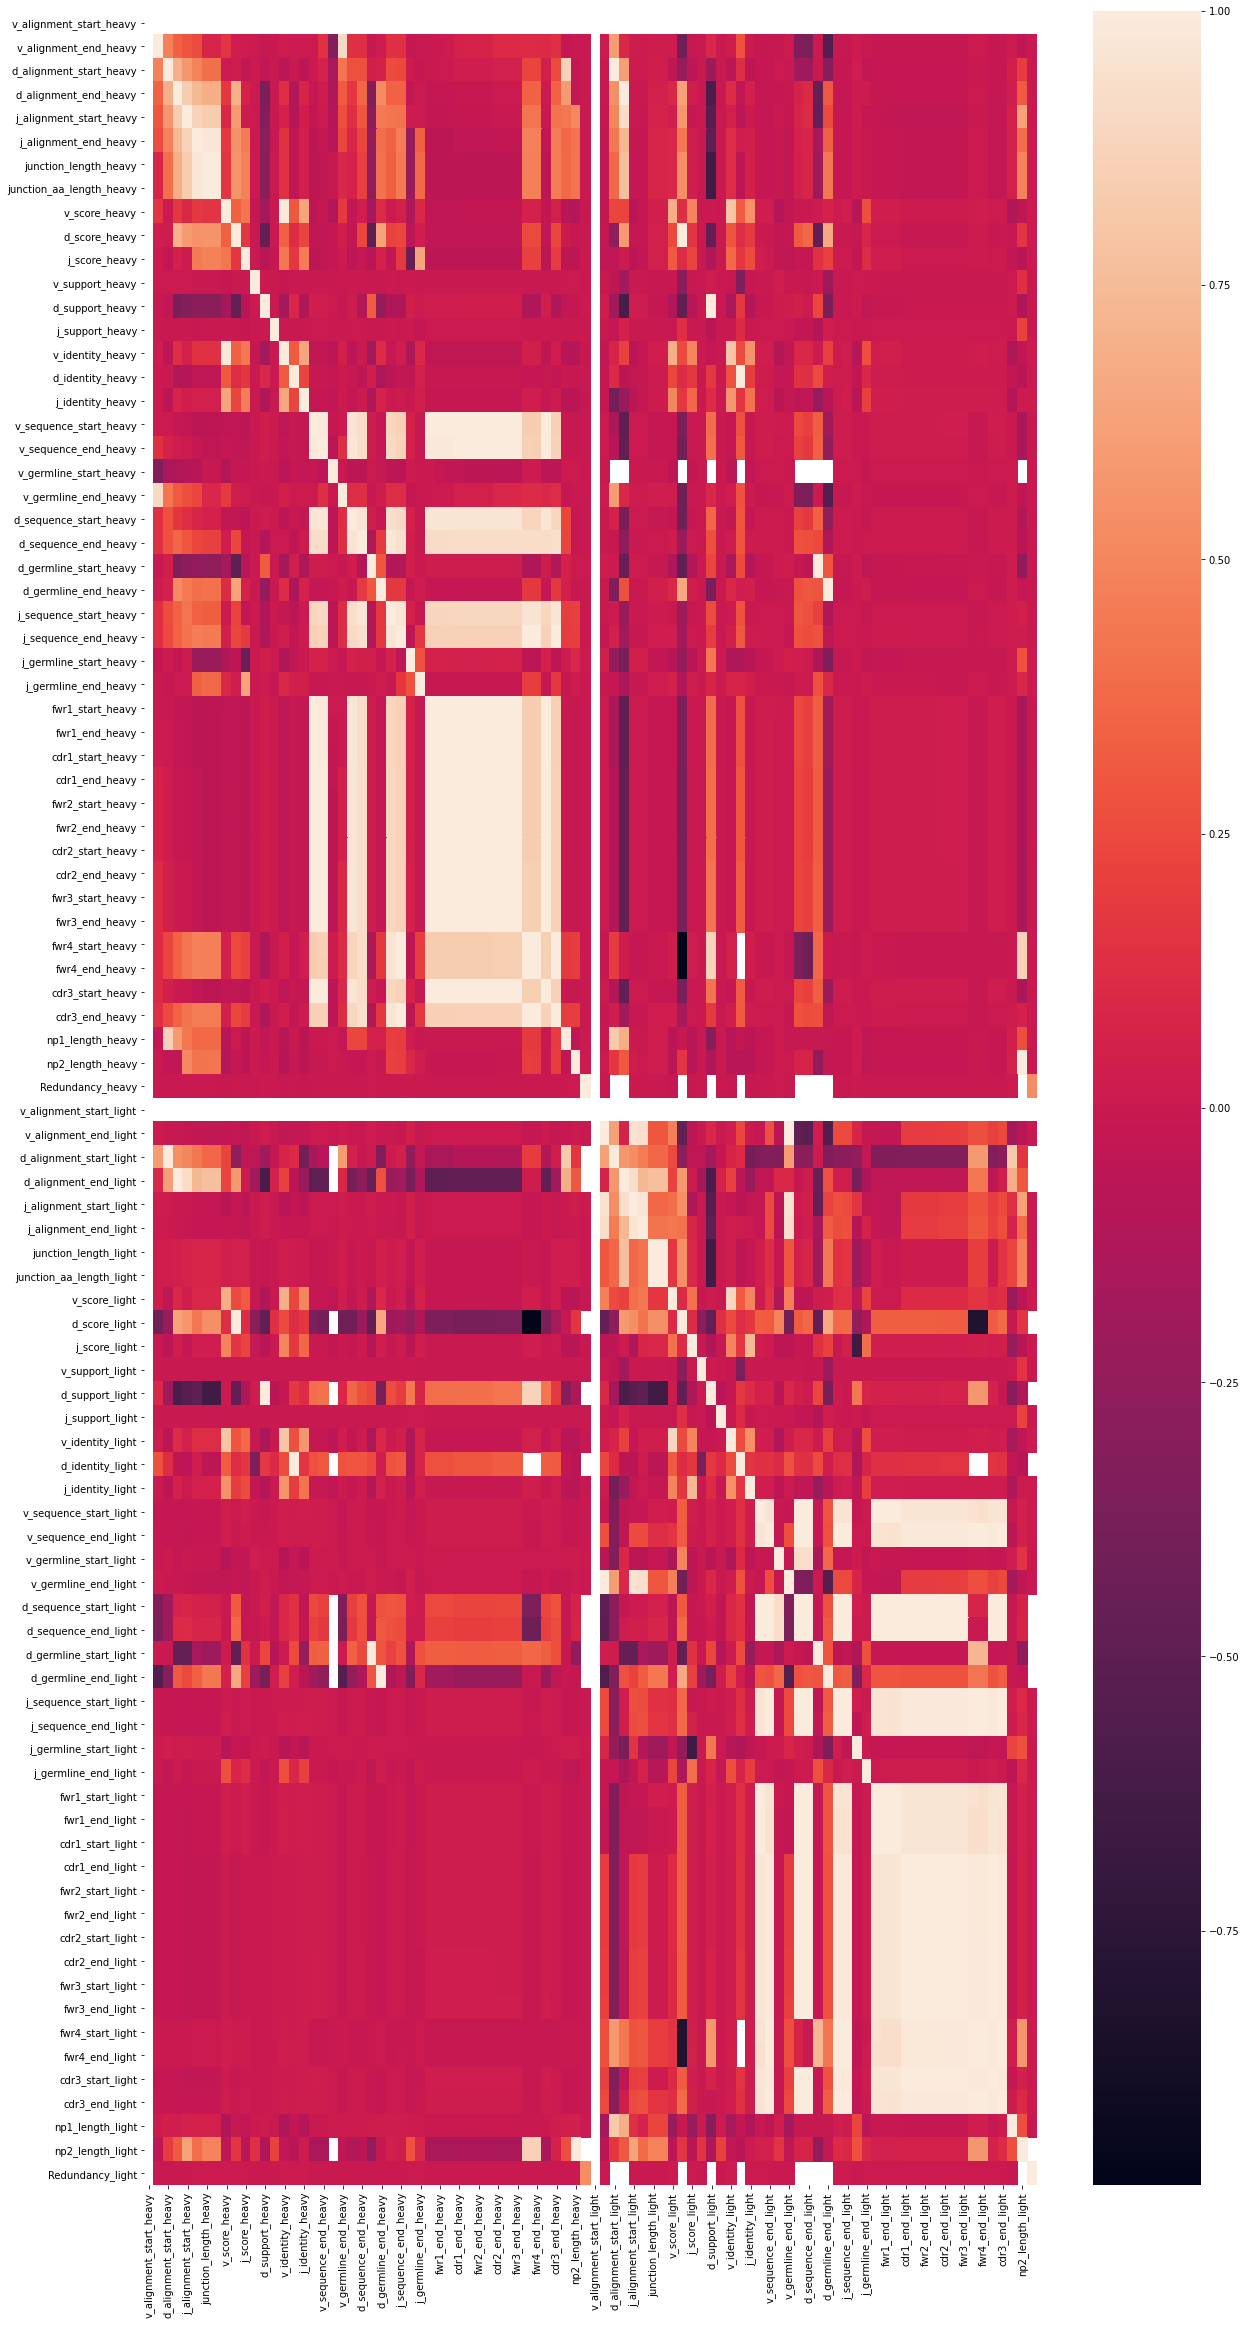

In [199]:
fig, ax = plt.subplots(figsize=(20, 40))     
ax = sns.heatmap(df.corr())
ax

In [ ]:
# v_alignment_start_heavy, j_alignment_start_heavy, j_alignment_end_heavy, d_alignment_end_heavy
#d_germline_end_light, d_germline_start_light, d_sequence_end_light, d_sequence_start_light,d_score_light, 
#d_support_heavy, 